# 目標

ロジスティック成長モデルを分析して連続力学系の雰囲気を掴む


# ロジスティック成長モデル

[`logistic_growth.ipynb`](./logistic_growth.ipynb)
で扱ったロジスティク写像と似た以下の微分方定式がある．

<div class="def" style="border-radius: 0.5rem; border:solid 0.01rem; background-color: rgba(0, 160, 255 , 0.2); padding:1rem 1rem 0rem 1rem" >
<div style="border-bottom: solid 0.01rem; margin:0 0 0.5rem 0" id="ex1">

**ロジスティック方程式**[[1](#footnote1)]

</div>
<div>

$$
\frac{dx}{dt} = ax(1-\frac{x}{N})
$$

</div>
</div>

離散力学系と同じで，これもバクテリアの個体数 ($x$) の時間変化
を表したモデルである．しかし，力学系としては同じだがモデルとしては異なる．

<figure style="width: 100%; max-width: 500px; margin: 0 auto; text-align: center;">
  <img src="./img/des-seq-diff.png" alt="離散と連続のモデルの違い" style="max-width: 100%; height: auto; object-fit: contain; border: 2px solid #ccc; border-radius: 5px; box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);">
  <figcaption style="font-style: italic; font-size: 0.8em; color: #666; margin-top: 5px;">離散と連続のモデルの違い</figcaption>
</figure>

今回は $N=1$ の場合を扱う．

離散力学系とは異なり，連続力学系では系の変化の規則が微分方程式で表される．([`dynamical_ssytem.ipynb`](./dynamical_system.ipynb))

これは 非線形 1 階自励的微分方程式である．
この方程式は解析的に解くことができ
解は

$$
\displaystyle{
    x(t) = \frac{x(0)e^{at}}{1-x(0) + x(0)e^at}
}
$$

である．

パラメータを $a=2.0$
初期値を $x = 0.01$
とした場合と，
パラメータを $a=3.3$
初期値を $x = 0.01$
とした場合を陽的オイラー法を用いた数値計算でシミュレーションするコードと解析解を以下に示す．


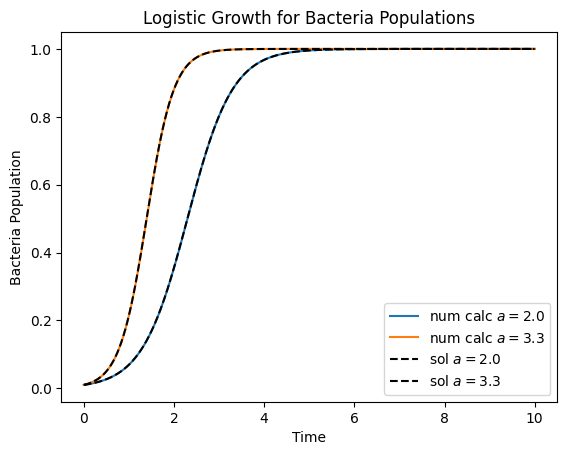

In [77]:
import matplotlib.pyplot as plt
from model.logistic_growth import SequentialLogisticGrowth

# a = 2.0 での f(x)
m_1 = SequentialLogisticGrowth(2.0)

# a = 3.5 での f(x)
m_2 = SequentialLogisticGrowth(3.3)

# 初期値
x_1_init: float = 0.01
x_2_init: float = 0.01

dt = 0.001
end = 10

# バクテリアの個体数のリスト
X_1, _ = m_1.simulate(x_1_init, dt, end)
X_2, T = m_2.simulate(x_2_init, dt, end)
A_1 = m_1.answer(x_1_init, T)
A_2 = m_2.answer(x_2_init, T)


# プロット
plt.plot(T, X_1[0], label="num calc $a = 2.0$")
plt.plot(T, X_2[0], label="num calc $a = 3.3$")
plt.plot(T, A_1, label="sol $a = 2.0$", ls="--", color="black")
plt.plot(T, A_2, label="sol $a = 3.3$", ls="--", color="black")
plt.title("Logistic Growth for Bacteria Populations")
plt.xlabel("Time")
plt.ylabel("Bacteria Population")
plt.legend()
plt.show()

次に， ロジスティック方程式の簡易的な相図を描画する．
相図とは
上述のグラフから $t$ 軸の要素を省いた，相空間 (状態空間，今回は $\mathbb{R}$ で数直線)
上のグラフである．
今回は，状態の変化の向きを矢印として書き加えた．


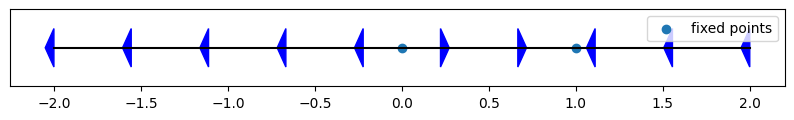

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from model.logistic_growth import SequentialLogisticGrowth

m = SequentialLogisticGrowth(1.2)

X = np.linspace(-2, 2, 10)
U = m.model(X)

arrow_length = 0.05
plt.figure(figsize=(10, 1))
plt.yticks([])
plt.plot(X, np.ones_like(X), "k")  # 直線を描画

plt.scatter([0, 1], [1, 1], label="fixed points")

# 矢印を描画
for x, u in zip(X, U):
    plt.arrow(
        x,
        1,
        (u / abs(u)) * arrow_length,
        0,
        head_width=0.01,
        head_length=arrow_length,
        fc="blue",
        ec="blue",
        length_includes_head=True,
    )
plt.ylim(0.99, 1.01)
plt.legend()
plt.show()

## 不動点

離散力学系とは異なり分岐現象は見られず，双方とも
$x = 0$ の[**不動点**](./fixed_point_seq.ipynb)から離れ
$x = 1$ の[**不動点**](./fixed_point_seq.ipynb)へ吸引される動きを見せている．


<a id="footnote2">1</a>: K.T. アリグッド, T.D. サウアー, J.A. ヨーク著, 星野高志ほか訳『カオス : 力学系入門』(Chaos: Introduction to Dynamical Systems), シュプリンガー・ジャパン, 東京, Japan, 2006.12-2007.4, ISBN: 978-4-431-71236-7 [4431712364].
